In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

# Универсальные функции

In [48]:
def infoColumn(data,column):
    print(data.loc[:, [column]].info())

#  универсаклная функция замены пропуска или nan на none
def replaceEmptySkipValue(data, columns):
    for column in columns:
        data[column] = data[column].apply(lambda x: None if pd.isnull(x) else ( None if (x == 'nan' or str(x).strip() == '')  else x))
    return data

# фильтрация данных на валидных значениях + значение по умочанию
def permitValidValue(data, column, premit_value, defaulVaue = None):
    data = replaceEmptySkipValue(data, [column])
    data[column] = data[column].apply(lambda x: x if x in premit_value else defaulVaue)
    return data



# Загрузка данных

In [49]:
student = pd.read_csv("C:\RVD_project_2\study_factory\skillFactory\module_2\stud_math.xls")

student.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

# инфо
def infoColumn(data,column):
    print(data.loc[:, [column]].info())

#  универсаклная функция замены пропуска или nan на none
def replaceEmptySkipValue(data, columns):
    for column in columns:
        data[column] = data[column].apply(lambda x: None if pd.isnull(x) else ( None if (x == 'nan' or str(x).strip() == '')  else x))
    return data

# фильтрация данных на валидных значениях + значение по умочанию
def permitValidValue(data, column, premit_value, defaulVaue = None, needOutliersData = False):
    data = replaceEmptySkipValue(data, [column])
    data[column] = data[column].apply(lambda x: x if x in premit_value else defaulVaue)

    if needOutliersData:
        return outliersData(data, column)
    else:
        return data

# фильтрауия данных
def permitPositivValue(data, column, defaulVaue = None, needOutliersData = False):
    data = replaceEmptySkipValue(data, [column])
    data[column] = data[column].apply(lambda x: int(x) if x >= 0  else defaulVaue)
    if needOutliersData:
        return outliersData(data, column)
    else:
        return data

#  функция фильтраци выбросов
def outliersData(data, column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    column_min = data[column].quantile(0.25) - 1.5 * IQR
    column_max = data[column].quantile(0.75) + 1.5 * IQR
    data = data[data[column].between(column_min, column_max)]
    return data

student = pd.read_csv("C:\RVD_project_2\study_factory\skillFactory\module_2\stud_math.xls")
# удалание строки - не было в описании
student.drop(['studytime, granular'], inplace = True, axis = 1)


#TODO Числовые данные   granular freetime goout health absences score
# age - выбросов нет
student = permitPositivValue(student, 'age')

# Medu - образование матери , доступыне значения (0,1,2,3,4)
student = permitValidValue(student, 'Medu', [1,2,3,4], needOutliersData=True )

# Fedu - образование отца , доступыне значения (0,1,2,3,4)
student = permitValidValue(student, 'Fedu', [1,2,3,4], needOutliersData=True)

#traveltime - время в пути до школы
student = permitValidValue(student, 'traveltime', [1,2,3,4],  needOutliersData=True)

#studytime  - ввремя на учёбу помимо школы в неделю
student = permitValidValue(student, 'studytime', [1,2,3,4], needOutliersData=True)

#failures   - количество внеучебных неудач
student = permitValidValue(student, 'failures', [1,2,3],defaulVaue=0, needOutliersData=True )

#famrel   - семейные отношения
student = permitValidValue(student, 'famrel', [1,2,3,4,5], needOutliersData=True)

#freetime   - свободное время после школы
student = permitValidValue(student, 'freetime', [1,2,3,4,5], needOutliersData=True)
# goout - проведение времени с друзьями
student = permitValidValue(student, 'goout', [1,2,3,4,5], needOutliersData=True)
# goout - текущее состояние здоровья
student = permitValidValue(student, 'health', [1,2,3,4,5], needOutliersData=True)

# absences  -  количество пропущенных занятий
student = permitPositivValue(student, 'absences', needOutliersData=True)

# score — баллы по госэкзамену по математике
student = permitPositivValue(student, 'score', needOutliersData=True)

# TODO  уникальных значений для номинативных переменных
# sex — пол ученика ('F' - женский, 'M' - мужской)
student = permitValidValue(student, 'sex', ['F', 'M'] )

# address — тип адреса ученика ('U' - городской, 'R' - за городом)
student = permitValidValue(student, 'address', ['U', 'R'] )

# famsize — размер семьи('LE3' <= 3, 'GT3' >3)
student = permitValidValue(student, 'famsize', ['LE3', 'GT3'] )

# Pstatus - статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
student = permitValidValue(student, 'Pstatus', ['T', 'A'] )

# Mjob - работа матери
student = permitValidValue(student, 'Mjob', ['teacher', 'health', 'services', 'at_home', 'other'] )

# Fjob  - работа отца
student = permitValidValue(student, 'Fjob', ['teacher', 'health', 'services', 'at_home', 'other'] )

# reason  — причина выбора школы
student = permitValidValue(student, 'reason', ['home', 'reputation', 'course',  'other'] )

# guardian  — опекун
student = permitValidValue(student, 'guardian', ['mother', 'father', 'other'] )

#schoolsup - дополнительная образовательная поддержка
student = permitValidValue(student, 'schoolsup', ['yes', 'no'] )

# famsup — семейная образовательная поддержка
student = permitValidValue(student, 'famsup', ['yes', 'no'] )

# paid — дополнительные платные занятия по математике
student = permitValidValue(student, 'paid', ['yes', 'no'] )

# activities — дополнительные внеучебные занятия
student = permitValidValue(student, 'activities', ['yes', 'no'] )

# nursery — посещал детский сад
student = permitValidValue(student, 'nursery', ['yes', 'no'] )

# higher — хочет получить высшее образование
student = permitValidValue(student, 'higher', ['yes', 'no'] )

# internet — наличие интернета дома
student = permitValidValue(student, 'internet', ['yes', 'no'] )

# romantic — в романтических отношениях
student = permitValidValue(student, 'romantic', ['yes', 'no'] )


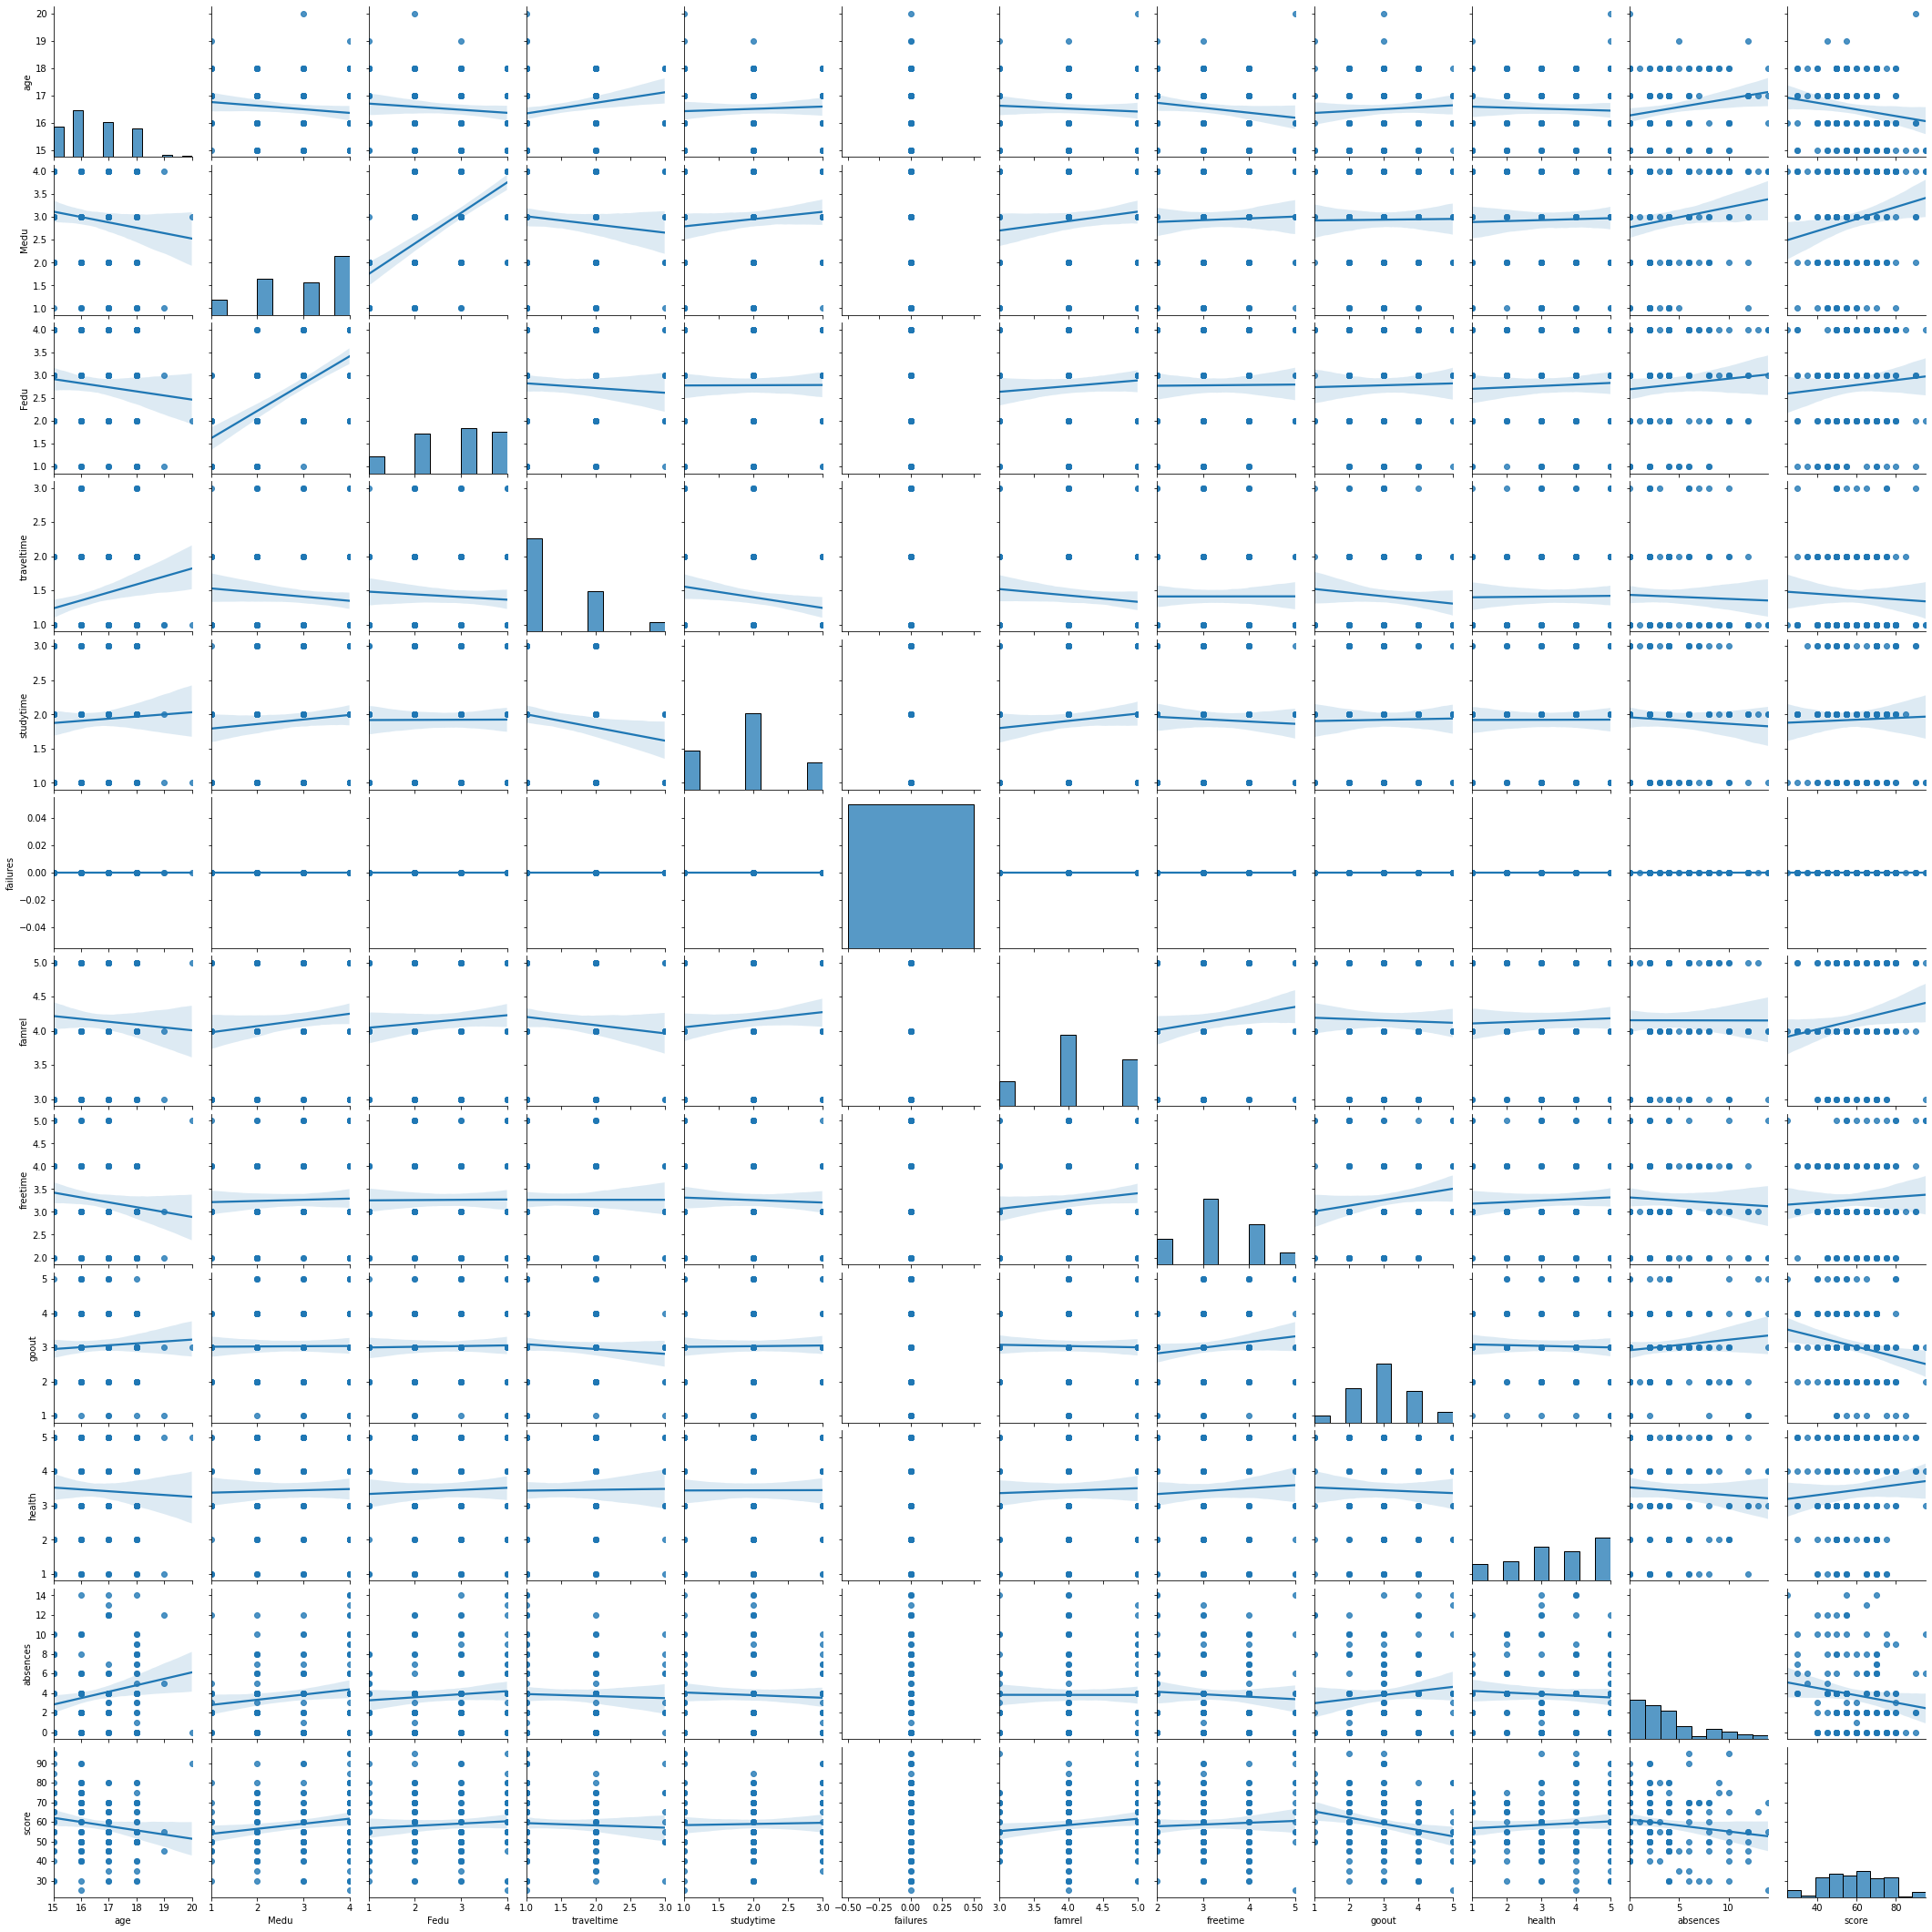

In [68]:
sns.pairplot(student, kind = 'reg')

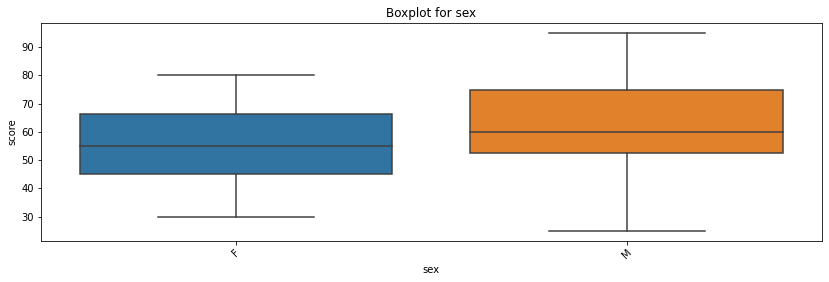

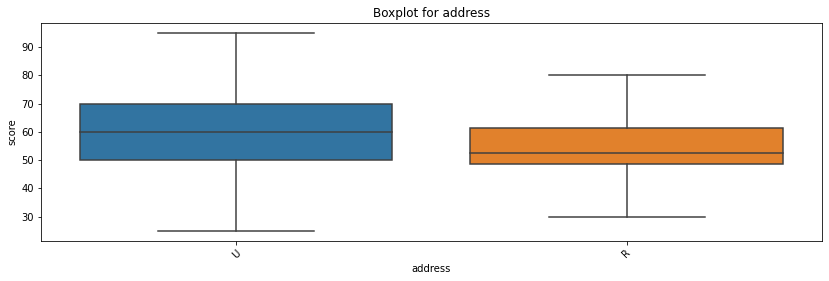

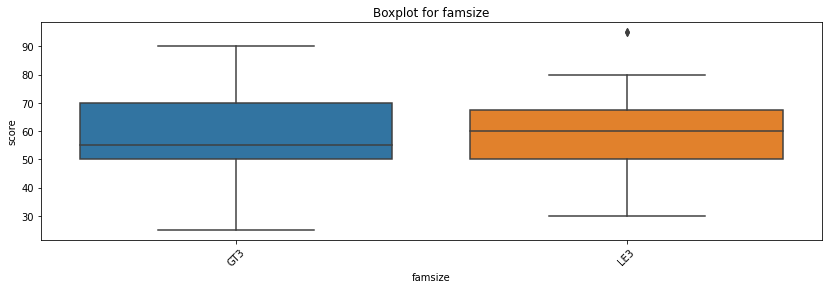

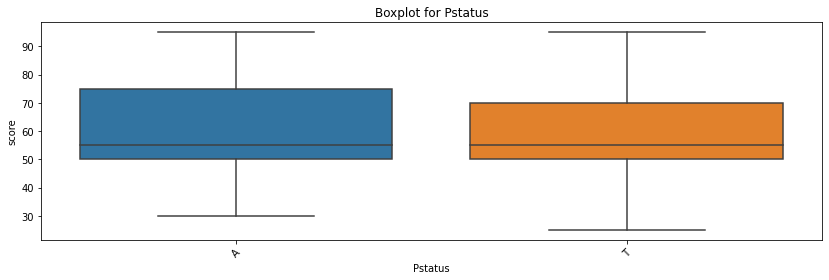

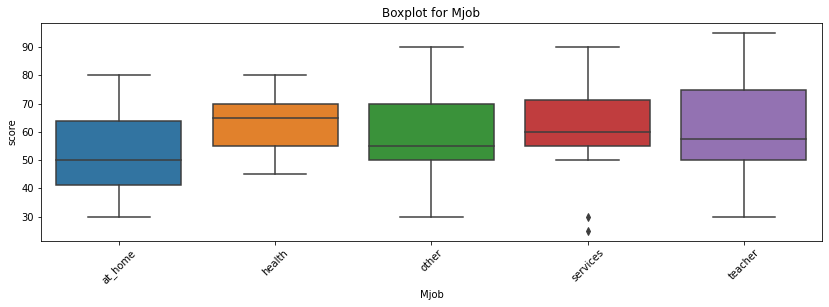

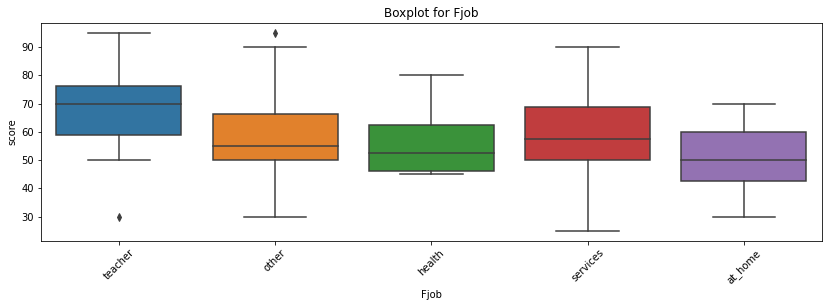

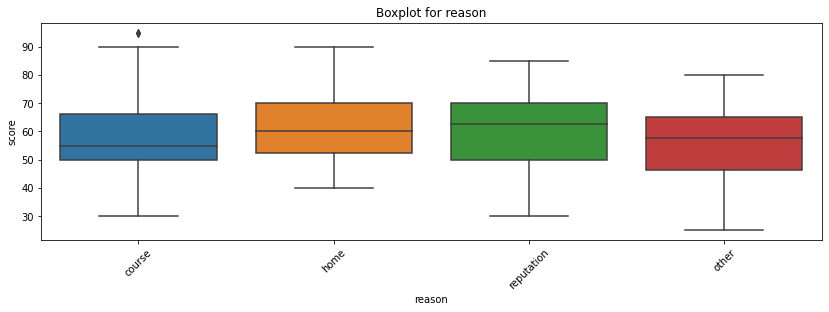

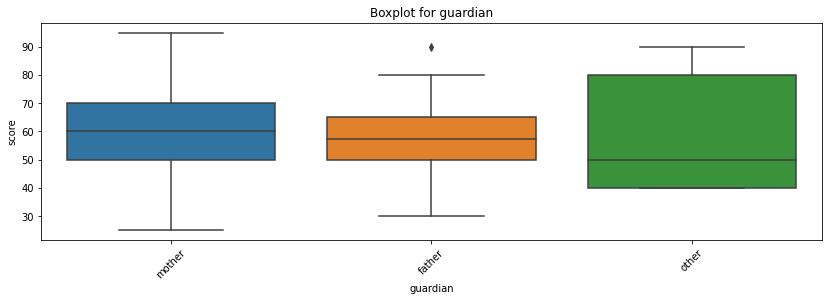

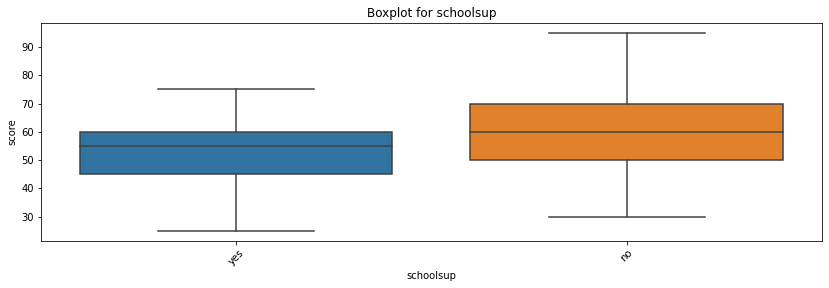

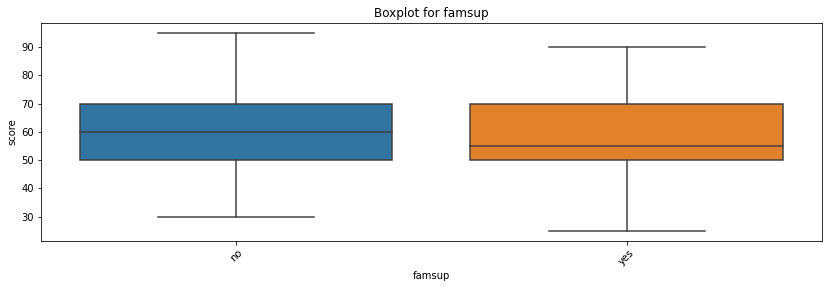

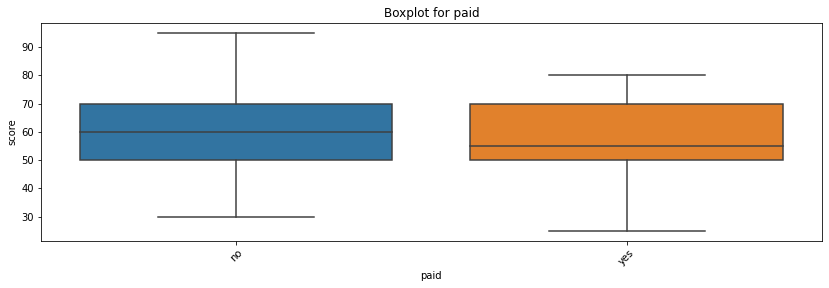

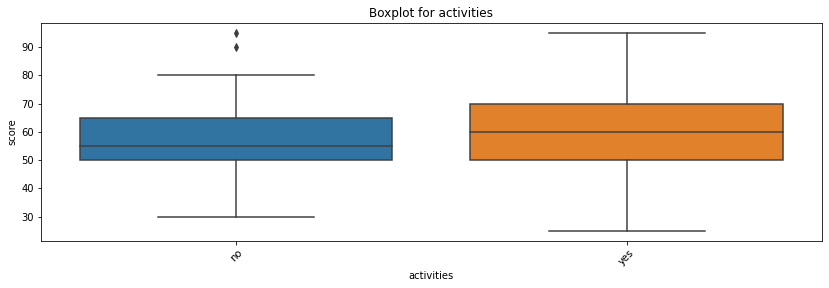

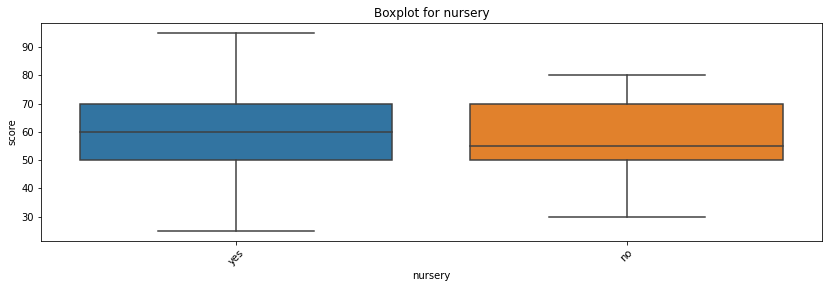

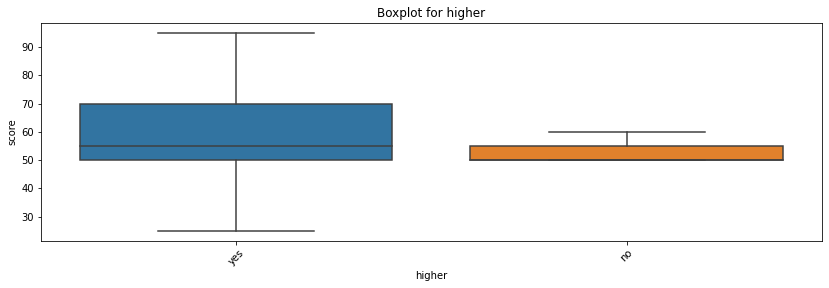

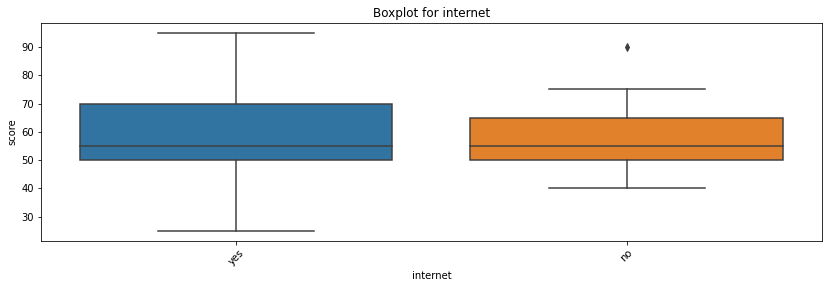

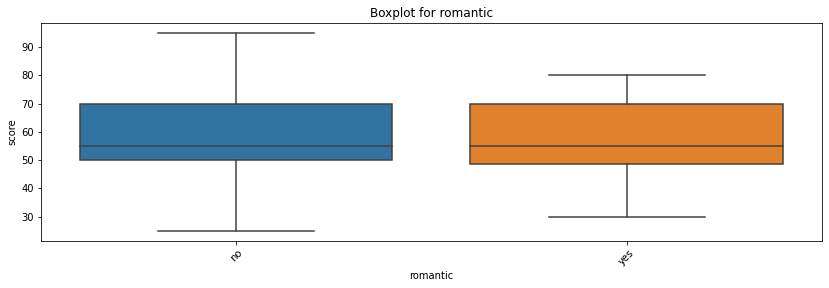

In [71]:
def get_boxplot(date, column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score',
                data=date.loc[:],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

for col in ['sex', 'address', 'famsize', 'Pstatus' ,  'Mjob' , 'Fjob' , 'reason'  , 'guardian' ,
            'schoolsup' , 'famsup' ,'paid' , 'activities' , 'nursery' , 'higher' , 'internet' ,
            'romantic', 'famrel']:
    get_boxplot(student, col)